In [1]:
import pandas as pd
from constants import DATA_PATH, EOS_FILE, SENTINEL_FILE

sentinel = pd.read_csv(DATA_PATH / SENTINEL_FILE)
eos = pd.read_csv(DATA_PATH / EOS_FILE)

In [2]:
eos = eos[eos['SM1 (%)'] != 50]
sentinel = sentinel[sentinel['SM1 (%)'] != 50]

In [3]:
from constants import X_cols_eos, X_cols_sentinel, y_col

X_sentinel = sentinel[X_cols_sentinel].values
X_eos = eos[X_cols_eos].values

y_sentinel = sentinel[y_col].values
y_eos = eos[y_col].values

In [4]:
import tensorflow as tf

models = {
#     "16, 1": tf.keras.Sequential([
#     # Input layer
#     tf.keras.Input(shape=(2, )),
#     tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dense(1)
# ]),
#     "8, 1": tf.keras.Sequential([
#     # Input layer
#     tf.keras.Input(shape=(2, )),
#     tf.keras.layers.Dense(8, activation='relu'),
#     tf.keras.layers.Dense(1)
# ]),
#     "2, 1": tf.keras.Sequential([
#     # Input layer
#     tf.keras.Input(shape=(2, )),
#     tf.keras.layers.Dense(2, activation='relu'),
#     tf.keras.layers.Dense(1)
# ]),
#     "4, 1": tf.keras.Sequential([
#     # Input layer
#     tf.keras.Input(shape=(2, )),
#     tf.keras.layers.Dense(4, activation='relu'),
#     tf.keras.layers.Dense(1)
# ]),
#     "8, 4, 2, 1": tf.keras.Sequential([
#     # Input layer
#     tf.keras.Input(shape=(2, )),
#     tf.keras.layers.Dense(8, activation='relu'),
#     tf.keras.layers.Dense(4, activation='relu'),
#     tf.keras.layers.Dense(2, activation='relu'),
#     tf.keras.layers.Dense(1)
# ]),
    "16, Dropout, 8, Dropout": tf.keras.Sequential([
    # Input layer
    tf.keras.Input(shape=(2, )),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.09),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.09),
    tf.keras.layers.Dense(1)
]),
    "16, Dropout": tf.keras.Sequential([
    # Input layer
    tf.keras.Input(shape=(2, )),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1)
])
}

2025-11-20 05:23:00.754569: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


========= 16, Dropout, 8, Dropout ========

Test Loss (MSE): 128.3861
Test MAE: 9.4945
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

Additional Metrics:
MSE: 128.3861
R² Score: 0.2650


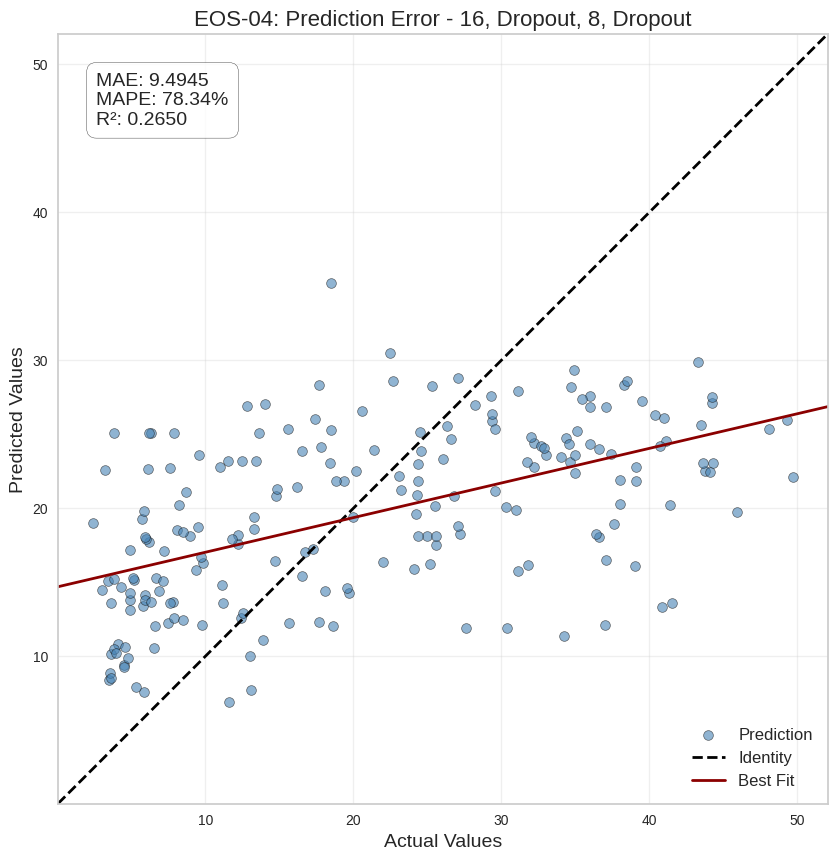

========= 16, Dropout ========

Test Loss (MSE): 127.1647
Test MAE: 9.5257
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

Additional Metrics:
MSE: 127.1647
R² Score: 0.2720


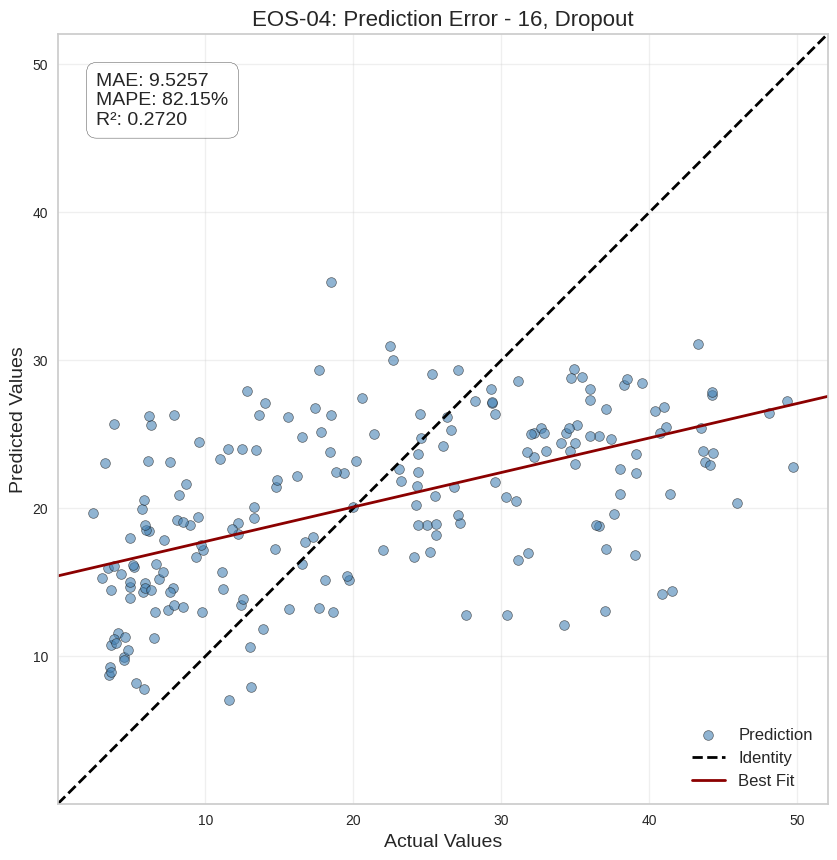

In [5]:
from model_experiments import ANNExperiment

results_eos = {}

for model_string, model in models.items():
    print(f"========= {model_string} ========")
    tf.keras.backend.clear_session()

    ae = ANNExperiment(X_eos, y_eos, satellite='EOS-04', type='uncensored')
    results = ae.run_experiment(model, model_param_string=model_string)
    results_eos[model_string] = results

In [6]:
import json
from constants import OUTPUT_PATH

with open(OUTPUT_PATH / "ann_experiments_uncensored" / "EOS-04_metrics.json", "w") as f:
    json.dump(results_eos, f, indent=4)

========= 16, Dropout, 8, Dropout ========

Test Loss (MSE): 122.9213
Test MAE: 9.0434
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

Additional Metrics:
MSE: 122.9214
R² Score: 0.2128


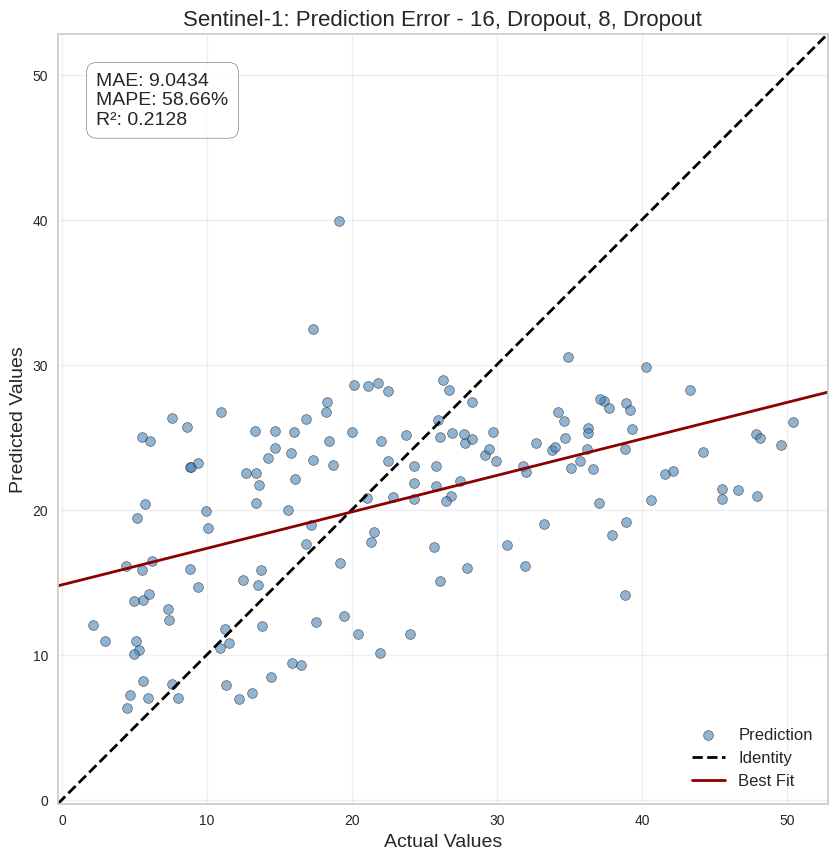

========= 16, Dropout ========

Test Loss (MSE): 120.9205
Test MAE: 8.9855
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

Additional Metrics:
MSE: 120.9205
R² Score: 0.2256


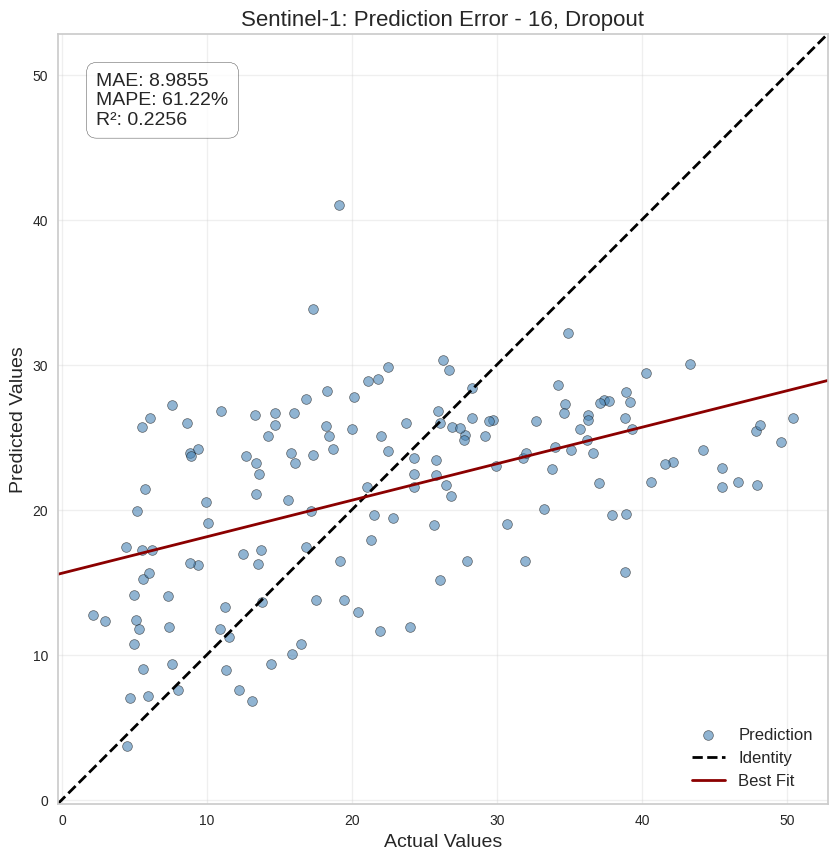

In [7]:
from model_experiments import ANNExperiment

results_sentinel = {}

for model_string, model in models.items():
    print(f"========= {model_string} ========")
    tf.keras.backend.clear_session()

    ae = ANNExperiment(X_sentinel, y_sentinel, satellite='Sentinel-1', type='uncensored')
    results = ae.run_experiment(model, model_param_string=model_string)
    results_sentinel[model_string] = results

In [8]:
import json
from constants import OUTPUT_PATH

with open(OUTPUT_PATH / "ann_experiments_uncensored" / "Sentinel-1_metrics.json", "w") as f:
    json.dump(results_sentinel, f, indent=4)